# **대여과다 대여소에 대한 따릉이 수요 예측**

## 데이터 설명
- 원본 데이터
<br>- 상위 30개 대여과다 대여소 추출에 사용: 서울특별시 공공자전거 대여소별 이용정보(월별)
<br>- 평일 변수 생성에 사용: 공휴일 데이터 (직접 조사)
<br>- 대여 데이터셋에 사용: 2023년 서울특별시 공공자전거 이용정보(시간대별)
<br>- 반납 데이터셋에 사용: 2023년 서울특별시 공공자전거 대여이력 정보
<br>- 날씨 데이터셋에 사용: 2023년 1시간 단위 날씨 데이터 + 1시간 평균 미세먼지농도 데이터

- 전처리 후 데이터 (시각화 및 예측에 사용)
<br>- 대여 데이터: 2023년_따릉이대여_날씨_3시간별.csv
<br>- 반납 데이터: 2023년_따릉이반납_날씨_3시간별.csv

- 종속변수
<br>- 대여건수(대여 데이터), 반납건수(반납 데이터)
  
- 독립변수
<br>- 시간대: 0~23시를 3시간 단위로 나눈 시간대 (1: 2-4시, 2: 5-7시, 3: 8-10시, 4: 11-13시, 5: 14-16시, 6: 17-19시, 7: 20-22시, 8: 23-1시)
<br>- 대여소번호: 대여건수가 반납건수보다 과도하게 많은 대여소 상위 30곳 (수요 불균형 대여소)
<br>- 대여월: 1월-12월
<br>- 평일: 평일이면 1, 평일 아니면 0(공휴일, 주말)
<br>- 기온: 시간대 별 평균 기온(°C)
<br>- 강수량: 시간대 별 평균 강수량(mm)
<br>- 풍속: 시간대 별 평균 풍속(m/s)
<br>- 습도: 시간대 별 평균 습도(%)
<br>- 적설: 시간대 별 평균 눈이 쌓인 정도(cm)
<br>- 미세먼지농도: 시간대 별 평균 미세먼지농도(㎍/㎥)

## 탐색적 데이터 분석 (EDA)

#### 대여 데이터

In [2]:
import pandas as pd
import numpy as np

In [3]:
bike_rental = pd.read_csv('2023년_따릉이대여_날씨_3시간별.csv', encoding='cp949', index_col=0)

In [4]:
bike_rental

,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,대여건수,대여월,평일
0,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,162,0,1,0
1,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,207,2,1,0
2,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,213,2,1,0
3,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,434,1,1,0
4,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,474,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
87595,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,3758,0,12,0
87596,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4009,0,12,0
87597,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4221,0,12,0
87598,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4591,1,12,0


In [6]:
### 데이터 확인
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87600 entries, 0 to 87599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간대          87600 non-null  int64  
 1   기온(°C)       87600 non-null  float64
 2   강수량(mm)      87600 non-null  float64
 3   풍속(m/s)      87600 non-null  float64
 4   습도(%)        87600 non-null  float64
 5   적설(cm)       87600 non-null  float64
 6   미세먼지농도(㎍/㎥)  87600 non-null  float64
 7   대여소번호        87600 non-null  int64  
 8   대여건수         87600 non-null  int64  
 9   대여월          87600 non-null  int64  
 10  평일           87600 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 8.0 MB


In [7]:
# 범주형 변수 category로 변경
bike_rental['시간대'] = bike_rental['시간대'].astype('category')
bike_rental['대여소번호'] = bike_rental['대여소번호'].astype('category')
bike_rental['대여월'] = bike_rental['대여월'].astype('category')
bike_rental['평일'] = bike_rental['평일'].astype('category')

bike_rental.dtypes

시간대            category
기온(°C)          float64
강수량(mm)         float64
풍속(m/s)         float64
습도(%)           float64
적설(cm)          float64
미세먼지농도(㎍/㎥)     float64
대여소번호          category
대여건수              int64
대여월            category
평일             category
dtype: object

In [8]:
### 기술통계량 확인
bike_rental.describe().T

,count,mean,std,min,25%,50%,75%,max
기온(°C),87600.0,14.106804,10.921583,-17.066667,5.200000,15.583333,23.566667,35.266667
강수량(mm),87600.0,0.182511,1.006807,0.000000,0.000000,0.000000,0.000000,16.033333
풍속(m/s),87600.0,2.271164,0.973459,0.133333,1.600000,2.133333,2.833333,7.466667
습도(%),87600.0,66.637671,18.598198,16.000000,53.666667,67.666667,81.333333,100.000000
적설(cm),87600.0,0.050833,0.505922,0.000000,0.000000,0.000000,0.000000,11.866667
미세먼지농도(㎍/㎥),87600.0,39.760274,34.507354,2.000000,20.000000,30.666667,47.666667,391.333333
대여건수,87600.0,6.450274,8.674609,0.000000,1.000000,4.000000,9.000000,128.000000


#### 반납 데이터

In [9]:
bike_return = pd.read_csv('2023년_따릉이반납_날씨_3시간별.csv', encoding='cp949', index_col=0)

In [10]:
bike_return

,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,반납건수,반납월,평일
0,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,162,1,1,0
1,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,207,4,1,0
2,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,213,2,1,0
3,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,434,0,1,0
4,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,474,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
87595,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,3758,0,12,0
87596,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4009,0,12,0
87597,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4221,0,12,0
87598,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4591,0,12,0


In [11]:
### 데이터 확인
bike_return.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87600 entries, 0 to 87599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시간대          87600 non-null  int64  
 1   기온(°C)       87600 non-null  float64
 2   강수량(mm)      87600 non-null  float64
 3   풍속(m/s)      87600 non-null  float64
 4   습도(%)        87600 non-null  float64
 5   적설(cm)       87600 non-null  float64
 6   미세먼지농도(㎍/㎥)  87600 non-null  float64
 7   대여소번호        87600 non-null  int64  
 8   반납건수         87600 non-null  int64  
 9   반납월          87600 non-null  int64  
 10  평일           87600 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 8.0 MB


In [13]:
# 범주형 변수 category로 변경
bike_return['시간대'] = bike_return['시간대'].astype('category')
bike_return['대여소번호'] = bike_return['대여소번호'].astype('category')
bike_return['반납월'] = bike_return['반납월'].astype('category')
bike_return['평일'] = bike_return['평일'].astype('category')

bike_return.dtypes

시간대            category
기온(°C)          float64
강수량(mm)         float64
풍속(m/s)         float64
습도(%)           float64
적설(cm)          float64
미세먼지농도(㎍/㎥)     float64
대여소번호          category
반납건수              int64
반납월            category
평일             category
dtype: object

In [14]:
### 기술통계량 확인
bike_return.describe().T

,count,mean,std,min,25%,50%,75%,max
기온(°C),87600.0,14.106804,10.921583,-17.066667,5.200000,15.583333,23.566667,35.266667
강수량(mm),87600.0,0.182511,1.006807,0.000000,0.000000,0.000000,0.000000,16.033333
풍속(m/s),87600.0,2.271164,0.973459,0.133333,1.600000,2.133333,2.833333,7.466667
습도(%),87600.0,66.637671,18.598198,16.000000,53.666667,67.666667,81.333333,100.000000
적설(cm),87600.0,0.050833,0.505922,0.000000,0.000000,0.000000,0.000000,11.866667
미세먼지농도(㎍/㎥),87600.0,39.760274,34.507354,2.000000,20.000000,30.666667,47.666667,391.333333
반납건수,87600.0,5.146381,12.931766,0.000000,0.000000,2.000000,6.000000,427.000000


-> 크게 이상치는 없는듯 하다. 데이터를 시각화해서 더 알아본다.

#### 데이터 시각화

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline

In [16]:
### 한글 및 부호 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic' #한글
mpl.rcParams['axes.unicode_minus'] = False #마이너스 부호

- 종속변수 분포

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/1854473090.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_rental['대여건수'], ax=axes[0])
/Users/rynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/1854473090.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `d

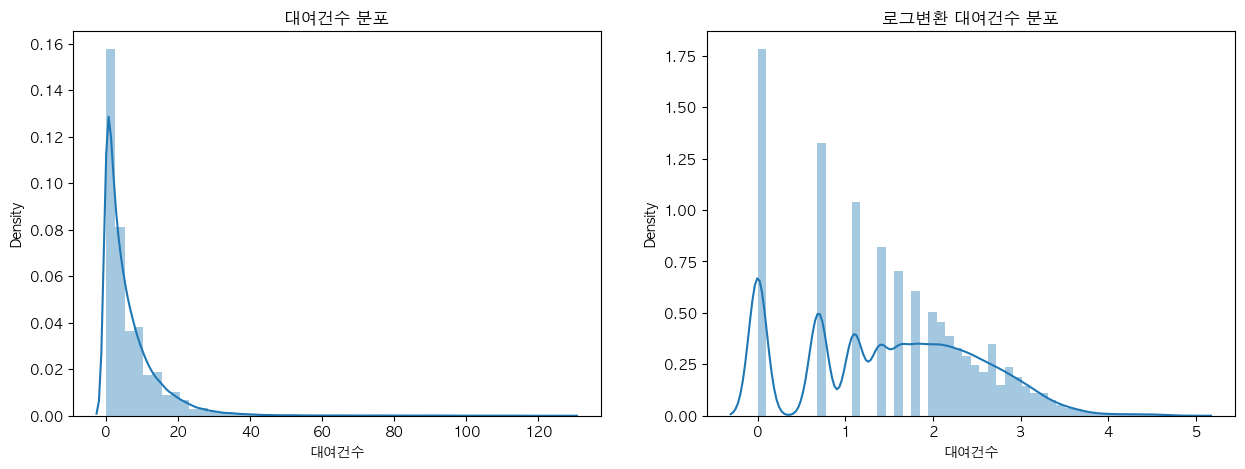

In [17]:
### 대여건수 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(bike_rental['대여건수'], ax=axes[0])
sns.distplot(np.log1p(bike_rental['대여건수']), ax=axes[1])

axes[0].set_title('대여건수 분포')
axes[1].set_title('로그변환 대여건수 분포')

plt.show()

In [18]:
# 대여건수 왜도 및 첨도 확인
print(bike_rental['대여건수'].skew(), bike_rental['대여건수'].kurt())

3.916013157417046 27.24446777685947


In [19]:
# 로그변환 대여건수 왜도 및 첨도 확인
print(np.log1p(bike_rental['대여건수']).skew(), np.log1p(bike_rental['대여건수']).kurt())

0.06683406372116017 -0.7789312152429275


/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/566448748.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bike_return['반납건수'], ax=axes[0])
/Users/rynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/566448748.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `dis

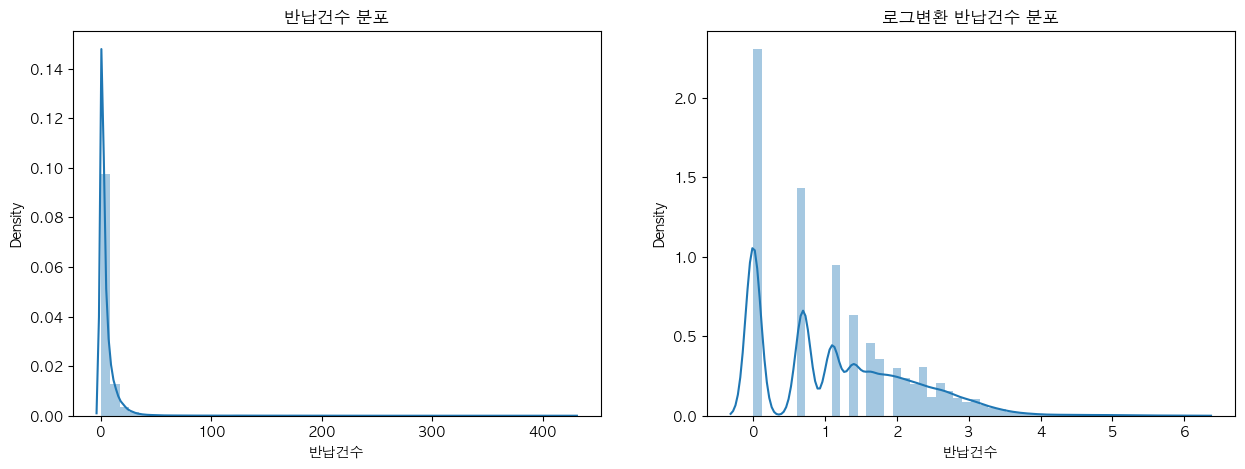

In [20]:
### 반납건수 분포 확인
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(bike_return['반납건수'], ax=axes[0])
sns.distplot(np.log1p(bike_return['반납건수']), ax=axes[1])

axes[0].set_title('반납건수 분포')
axes[1].set_title('로그변환 반납건수 분포')

plt.show()

In [21]:
# 반납건수 왜도 및 첨도 확인
print(bike_return['반납건수'].skew(), bike_return['반납건수'].kurt())

11.662487152387264 206.2926698417124


In [22]:
# 로그변환 반납건수 왜도 및 첨도 확인
print(np.log1p(bike_return['반납건수']).skew(), np.log1p(bike_return['반납건수']).kurt())

0.6408252703744753 -0.03490705688728646


-> 로그변환을 했지만 정규분포를 따른다고 하기는 어렵다. 하지만 변환 전보다 확실히 분포가 나아졌기에 예측 시 타깃값은 로그변환을 하도록 한다.

- 종속변수와 독립변수의 상관관계

In [ ]:
# 시각화 한 내용 넣기

<br>
<br>

## 피처 엔지니어링
##### : 대여 데이터와 반납 데이터 모두 독립변수가 동일하고, 대여량과 반납량은 독립변수에 영향을 받는 정도가 비슷할 것이므로 대여 데이터로 피처 엔지니어링을 진행해본다.

#### **OLS 회귀분석을 통해 독립변수의 유의성 확인**
- R-squared: 결정계수, 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율로, 회귀식의 설명력을 나타냄 (1에 가까울수록 성능이 좋음)
- t: t-test, 독립변수와 종속변수 사이의 상관관계로, 값이 클수록 상관도가 큼
- p-value(P > |t|): 독립변수들의 유의 확률로, 독립변수가 종속변수에 영향을 미친다는 가정이 유의하다는 것을 알려줌 (0.05보다 작아야 유의미)
- Cond. No:	다중공선성 검정으로, 독립변수간 상관관계가 있는지 보는 것이며, 10이상이면 다중공선성이 있다고 판단

In [25]:
# OLS 회귀분석에서 컬럼명 오류 문제 해결
ols_df = bike_rental.copy()
ols_df.columns = ['시간대', '기온', '강수량', '풍속', '습도', '적설', '미세먼지농도', '대여소번호', '대여건수', '대여월', '평일']

In [26]:
# 타깃값으로 로그변환한 대여건수를 사용
ols_df['로그변환대여건수'] = np.log1p(ols_df['대여건수'])

In [27]:
### OLS 회귀분석 (C는 범주형 변수 처리)
import statsmodels.formula.api as smf

ols = smf.ols('로그변환대여건수 ~ C(시간대) + C(대여소번호) + C(대여월) + C(평일) + 기온 + 강수량 + 풍속 + 습도 + 적설 + 미세먼지농도 + 0', data=ols_df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:               로그변환대여건수   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1960.
Date:                Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                        04:30:14   Log-Likelihood:                -90120.
No. Observations:               87600   AIC:                         1.804e+05
Df Residuals:                   87545   BIC:                         1.809e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(시간대)[1]            0.3192      0.022  

-> 대여소(1854, 2349, 3642)들을 제외하면 독립변수들의 p-value가 0.05보다 작으므로 이 변수들은 통계적으로 유의미하다고 할 수 있다.
<br>-> 다중공선성이 발생한다는 경고가 뜨는데 여기에 대해서 조금 더 알아보기로 한다.

<br>

#### **다중공선성 확인**
- 다중공선성: 회귀분석에서 독립 변수들 간에 높은 상관관계가 있는 경우 발생, 다중공선성이 발생하면 과적합이 발생해 모델의 안정성과 해석력을 해칠 수 있음
- 분산팽창계수(Variance Inflation Factor, VIF): 다중공선성을 평가하는 데에 사용되는 지표로, 각 독립 변수의 설명력이 다른 독립 변수들과 어떻게 상호작용하는지를 나타냄 (일반적으로 VIF 값이 10을 초과하는 경우 다중공선성의 증거로 간주)

In [28]:
### 원핫인코딩 (범주형 변수에 대해, 해당 변수의 범주 개수만큼의 새로운 변수로 쪼개어 0과 1 값을 할당 -> 모델이 학습할 수 있도록)
# drop_first=True: 기준이 되는 첫번째 범주에 대해서는 생성하지 않음
oed_rental = pd.get_dummies(data = bike_rental, columns = ['대여소번호', '시간대', '대여월'], drop_first=True, dtype=int)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(oed_rental.values, i) for i in range(oed_rental.shape[1])]
vif['features'] = oed_rental.columns
vif = vif.sort_values('VIF Factor', ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,19.357764,기온(°C)
1,17.357099,습도(%)
2,7.599572,풍속(m/s)
3,6.135247,대여월_8
4,6.036589,대여월_7
5,4.986054,대여월_9
6,4.861983,대여월_6
7,3.934539,대여월_5
8,3.313939,대여월_10
9,3.077714,미세먼지농도(㎍/㎥)


-> 기온과 습도에서 다중공선성이 발생하는 것으로 예상된다. 그러나 그 수치가 심각하게 크지 않기 때문에 제거하지 않는다. (실제로 제거 시 성능이 떨어졌고, 릿지와 라쏘 등 규제기법을 적용한 모델을 사용했을 때도 크게 성능이 오르지 않았음)
<br>-> 또한 일반적으로 생각했을 때, 기온과 습도는 상관관계가 있기에 다중공선성이 발생한다고 나올 수 있다. 그러나 기온은 높지만 습도가 낮을 때, 혹은 기온은 낮지만 습도가 높을 때가 분명히 존재하고 두 경우에서는 따릉이 이용량이 차이날 것이다. 따라서 두 변수 모두 독립변수로 사용하도록 한다.

<br>
<br>

## 모델링

#### **0. 학습 데이터, 예측 데이터 구분**

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
train_set, test_set = train_test_split(oed_rental, test_size = 0.25, random_state=42)
train_set.shape, test_set.shape

((65700, 55), (21900, 55))

In [106]:
# 학습 데이터
X_train = train_set.loc[:, train_set.columns != '대여건수'].reset_index(drop=True)
y_train = np.log1p(train_set['대여건수']).reset_index(drop=True)

# 예측 데이터
X_test = test_set.loc[:, test_set.columns != '대여건수'].reset_index(drop=True)
y_test = test_set['대여건수'].reset_index(drop=True)

<br>

#### **1. Linear Regression**
- 예측 모델 간의 성능 비교를 위해 단순 선형회귀 분석을 진행

In [50]:
### 모델 생성 및 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
### 예측
lr_pred = lr.predict(X_test)

In [52]:
### 평가
lr_mae = mean_absolute_error(y_test, np.expm1(lr_pred))
lr_mse = mean_squared_error(y_test, np.expm1(lr_pred))
lr_rsquare = r2_score(y_test, np.expm1(lr_pred))

print('MAE : {0:.3f}, MSE : {0:.3f}'.format(lr_mae, lr_mse))
print('R-squared : {0:.3f}'.format(lr_rsquare))

MAE : 3.392, MSE : 3.392
R-squared : 0.503


-> r^2을 보면 독립변수가 종속변수를 65% 정도 설명한다고 말할 수 있다. 또한 MAE를 보면 실제 건수와 평균 3대 정도 오차가 있다고 할 수 있다.

<br>

#### **2. 랜덤 포레스트 회귀 모델**
- 훈련 데이터를 랜덤으로 샘플링한 모델 n개를 각각 훈련하여 결과를 평균하는 방법
<br>-> 여러 개의 작은 결정 트리를 만들어 그것들이 예측한 값들의 평균값을 최종 예측 값으로 정하는 것

- 일반적으로 단순 선형회귀 모델보다 정확도가 높으며, 변수의 중요도를 알 수 있으므로 랜덤 포레스트를 사용해 봄

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
### 모델 생성 및 훈련
rf = RandomForestRegressor()

# 그리드서치 객체 생성
rf_params = {'random_state': [42],
             'n_estimators': [600, 750, 900]} #결정 트리의 수

grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5)

# 그리드서치 수행
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [600, 750, 900], 'random_state': [42]})

In [55]:
# 최적 하이퍼파라미터 출력
print('최적 하이퍼파라미터 :', grid_rf.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 900, 'random_state': 42}


In [56]:
### 예측
rf_pred = grid_rf.best_estimator_.predict(X_test)

In [57]:
### 평가
rf_mae = mean_absolute_error(y_test, np.expm1(rf_pred))
rf_mse = mean_squared_error(y_test, np.expm1(rf_pred))
rf_rsquare = r2_score(y_test, np.expm1(rf_pred))

print('MAE : {0:.3f}, MSE : {0:.3f}'.format(rf_mae, rf_mse))
print('R-squared : {0:.3f}'.format(rf_rsquare))

MAE : 2.522, MSE : 2.522
R-squared : 0.772


-> r^2을 보면 독립변수가 종속변수를 77% 정도 설명한다고 말할 수 있다. 또한 MAE를 보면 실제 건수와 평균 2대 정도 오차가 있다고 할 수 있다. 따릉이 수요 예측은 정확도가 중요한 작업이므로 단순 선형회귀 모델보다 r^2 값이 더 높은 랜덤 포레스트 모델을 이용해 수요 예측을 진행하기로 한다.

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/556456798.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=axes[0][0])
/Users/rynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/556456798.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

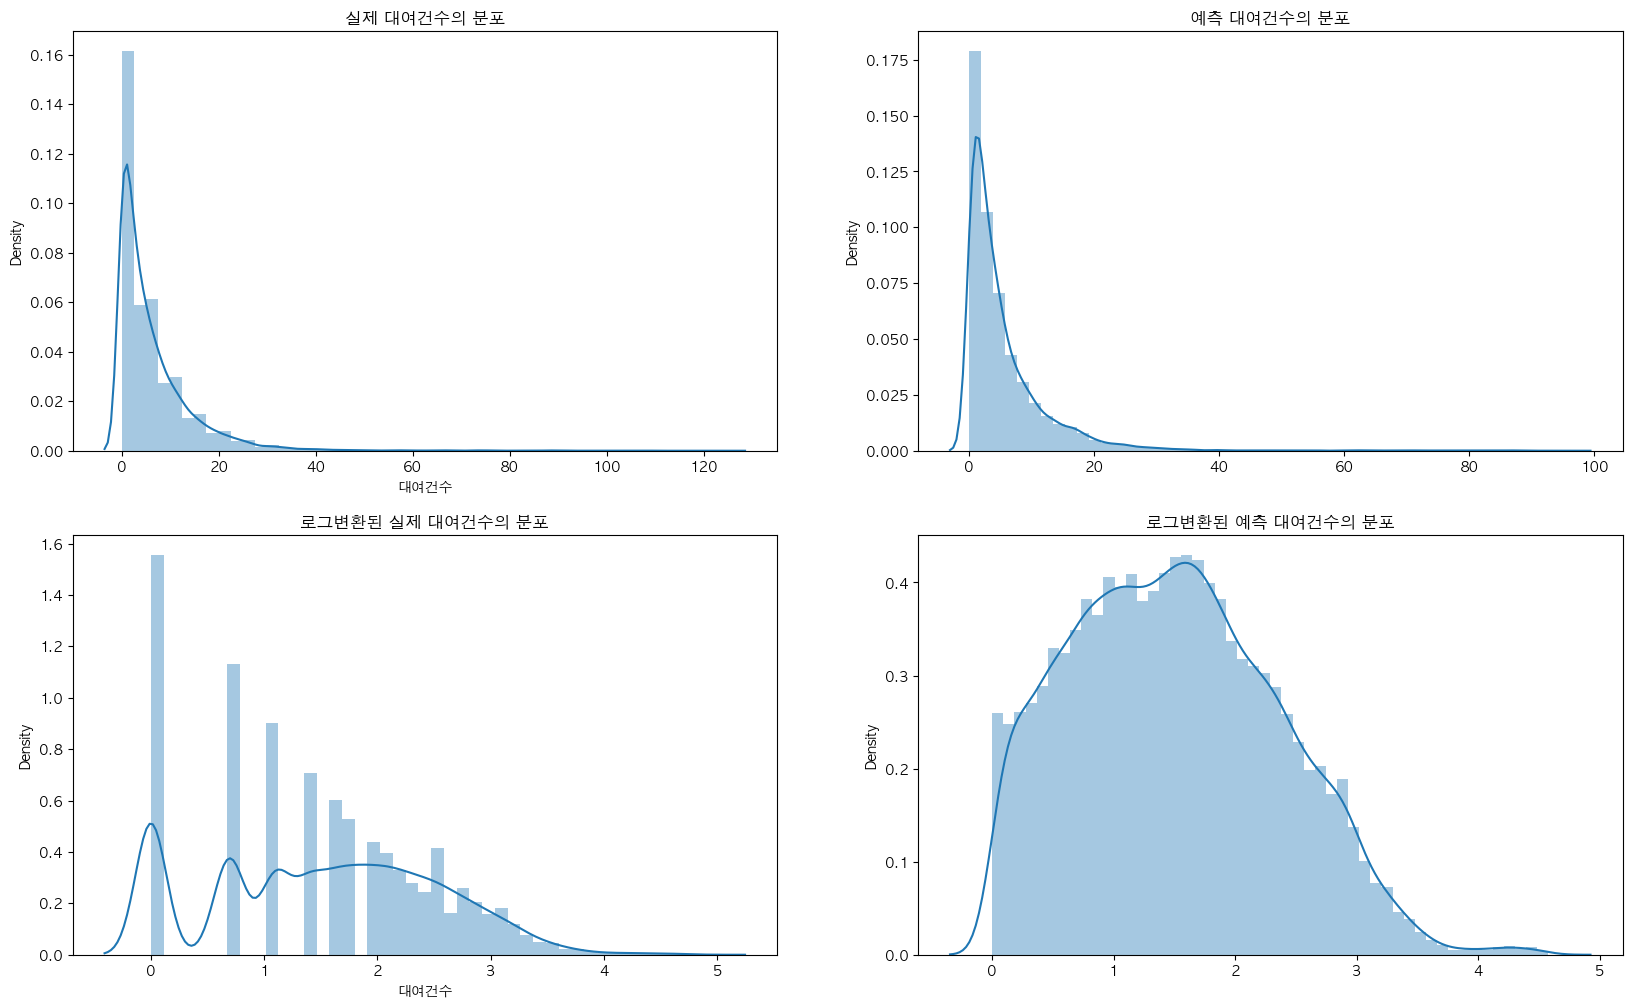

In [58]:
### 실제 값과 예측 값의 분포 비교
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.distplot(y_test, ax=axes[0][0])
axes[0][0].set_title('실제 대여건수의 분포')
sns.distplot(np.expm1(rf_pred), ax=axes[0][1])
axes[0][1].set_title('예측 대여건수의 분포')

sns.distplot(np.log1p(y_test), ax=axes[1][0])
axes[1][0].set_title('로그변환된 실제 대여건수의 분포')
sns.distplot(rf_pred, ax=axes[1][1])
axes[1][1].set_title('로그변환된 예측 대여건수의 분포')

plt.show()

<br>

#### **변수 중요도 확인**

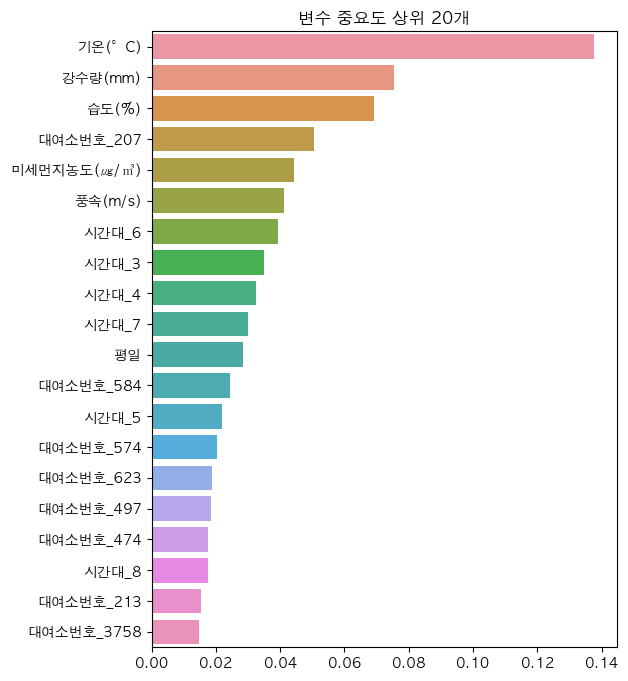

In [59]:
# 랜덤 포레스트 기반 변수 중요도 
feature_imp = grid_rf.best_estimator_.feature_importances_
feature_imp = pd.Series(feature_imp, index=X_train.columns).sort_values(ascending=False)[:20] #중요도 상위 20개

# 시각화
plt.figure(figsize=(6, 8))
plt.title('변수 중요도 상위 20개')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()

-> 예상대로 날씨가 따릉이 대여에 많은 영향을 미치는 것 같다. 특히 기온이 따릉이 수요량에 가장 중요하게 작용하고 있으며, 강수량, 습도, 미세먼지농도, 풍속 등도 다른 변수들에 비해 영향을 많이 미치고 있다. 시간대를 보면 6과 3이 다른 시간대에 비해 가장 높게 나오고 있는데, 이는 시간대 6이 퇴근 시간대(17-19시)고, 시간대 3은 출근 시간대(8-10시)기 때문으로 예상된다.

<br>
<br>

## 따릉이 총 수요 예측
- 반납 데이터에 대해서도 랜덤 포레스트 모델을 이용해 예측 모델을 생성
- 대여소/시간대/날씨에 따라 대여건수와 반납건수를 각각 예측한 후, 반납건수-대여건수를 계산해서 따릉이 총 수요를 예측

#### **반납건수 예측 모델 생성**

In [60]:
### 반납 데이터
bike_return

,시간대,기온(°C),강수량(mm),풍속(m/s),습도(%),적설(cm),미세먼지농도(㎍/㎥),대여소번호,반납건수,반납월,평일
0,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,162,1,1,0
1,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,207,4,1,0
2,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,213,2,1,0
3,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,434,0,1,0
4,1,1.533333,0.000000,1.633333,73.333333,0.000000,84.333333,474,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
87595,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,3758,0,12,0
87596,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4009,0,12,0
87597,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4221,0,12,0
87598,8,1.700000,0.566667,2.033333,97.666667,6.566667,26.333333,4591,0,12,0


In [77]:
# 반납월 변수명을 대여월로 변경 (나중에 수요 예측 시 대여 데이터와 변수명을 맞추기 위함)
bike_return.rename(columns = {'반납월':'대여월'}, inplace=True)

In [78]:
bike_return.columns

Index(['시간대', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)',
       '대여소번호', '반납건수', '대여월', '평일'],
      dtype='object')

In [79]:
bike_rental.columns

Index(['시간대', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '적설(cm)', '미세먼지농도(㎍/㎥)',
       '대여소번호', '대여건수', '대여월', '평일'],
      dtype='object')

In [81]:
### 원핫인코딩
oed_return = pd.get_dummies(data = bike_return, columns = ['대여소번호', '시간대', '대여월'], drop_first=True, dtype=int)

In [82]:
### 학습/예측 데이터 구분
train_set_2, test_set_2 = train_test_split(oed_return, test_size = 0.25, random_state=42)

# 학습 데이터
X_train_2 = train_set_2.loc[:, train_set_2.columns != '반납건수'].reset_index(drop=True)
y_train_2 = np.log1p(train_set_2['반납건수']).reset_index(drop=True)

# 예측 데이터
X_test_2 = test_set_2.loc[:, test_set_2.columns != '반납건수'].reset_index(drop=True)
y_test_2 = test_set_2['반납건수'].reset_index(drop=True)

In [83]:
### 랜덤 포레스트 모델 생성 및 훈련
rf_2 = RandomForestRegressor(random_state=42, n_estimators=900)
rf_2.fit(X_train_2, y_train_2)

RandomForestRegressor(n_estimators=900, random_state=42)

In [84]:
### 예측
rf_pred_2 = rf_2.predict(X_test_2)

In [85]:
### 평가
rf_mae_2 = mean_absolute_error(y_test_2, np.expm1(rf_pred_2))
rf_mse_2 = mean_squared_error(y_test_2, np.expm1(rf_pred_2))
rf_rsquare_2 = r2_score(y_test_2, np.expm1(rf_pred_2))

print('MAE : {0:.3f}, MSE : {0:.3f}'.format(rf_mae_2, rf_mse_2))
print('R-squared : {0:.3f}'.format(rf_rsquare_2))

MAE : 2.164, MSE : 2.164
R-squared : 0.773


-> r^2을 보면 독립변수가 종속변수를 77% 정도 설명한다고 말할 수 있다. 또한 MAE를 보면 실제 건수와 평균 2대 정도 오차가 있다고 할 수 있다.

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/3930671533.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_2, ax=axes[0][0])
/Users/rynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_60480/3930671533.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

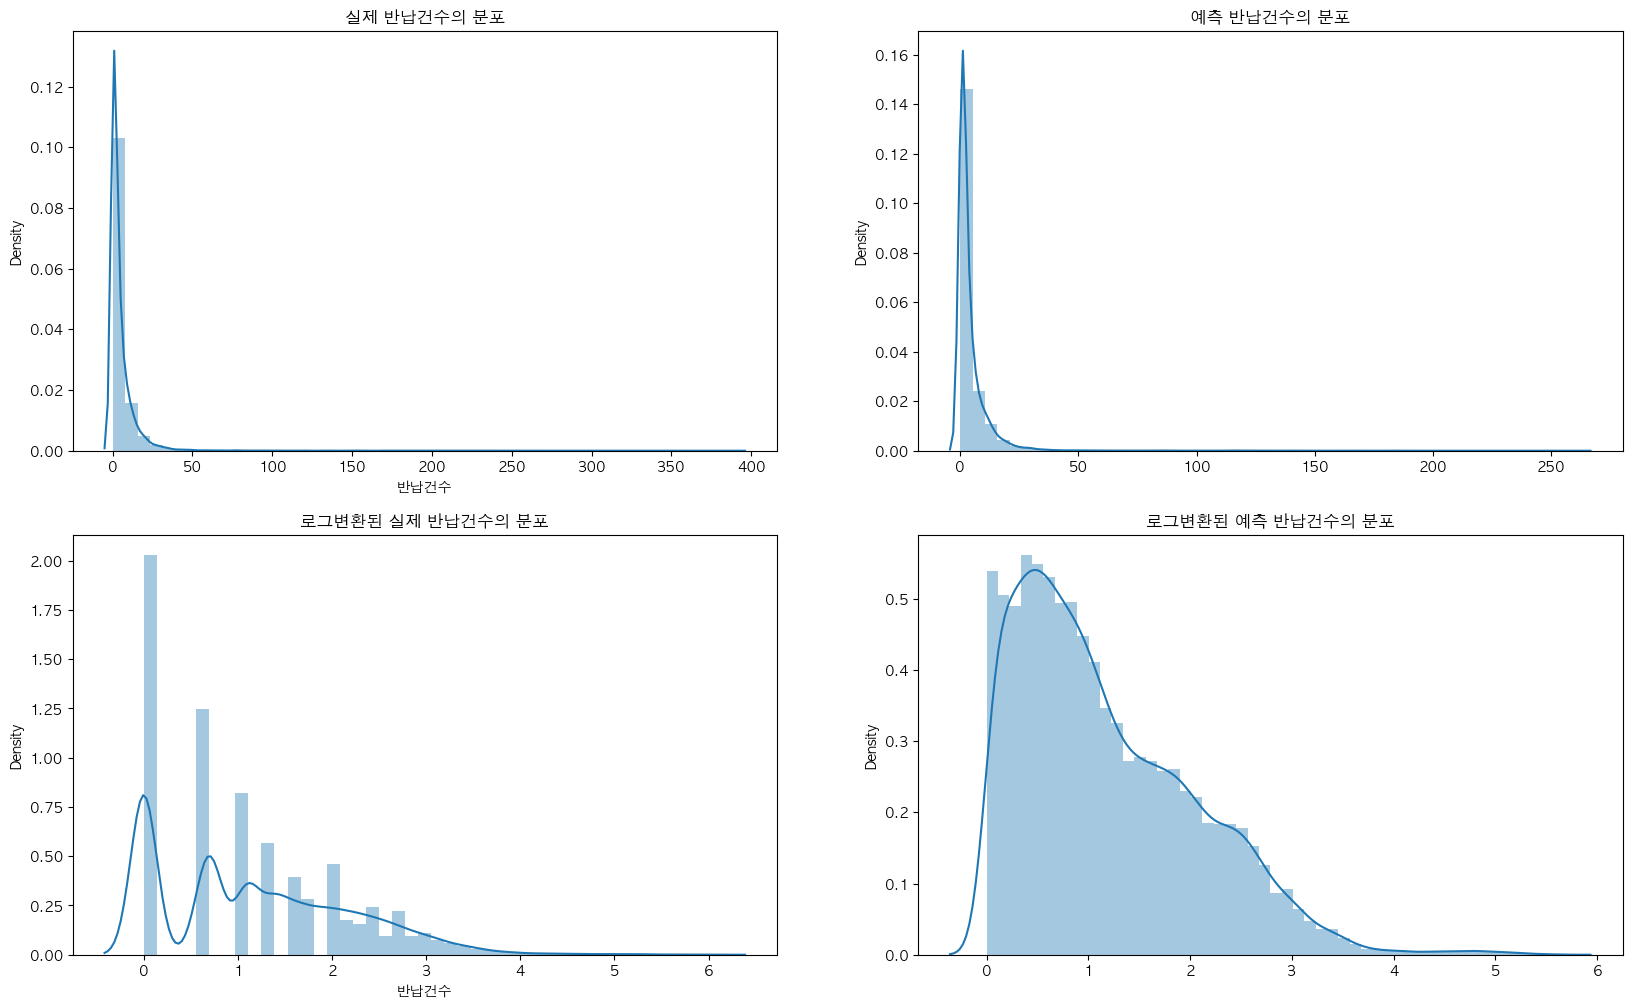

In [86]:
### 실제 값과 예측 값의 분포 비교
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.distplot(y_test_2, ax=axes[0][0])
axes[0][0].set_title('실제 반납건수의 분포')
sns.distplot(np.expm1(rf_pred_2), ax=axes[0][1])
axes[0][1].set_title('예측 반납건수의 분포')

sns.distplot(np.log1p(y_test_2), ax=axes[1][0])
axes[1][0].set_title('로그변환된 실제 반납건수의 분포')
sns.distplot(rf_pred_2, ax=axes[1][1])
axes[1][1].set_title('로그변환된 예측 반납건수의 분포')

plt.show()

<br>

#### **총 수요 예측**
- 앞서 만들었던 랜덤 포레스트 기반의 대여건수/반납건수 예측 모델로 총 예상 수요(예상 반납건수 - 예상 대여건수)를 계산

In [94]:
### 따릉이 수요 예측 함수
def bike_demand(data):
    
    # 입력받은 데이터를 데이터프레임으로 변환
    col_names = X_train.columns
    data_df = pd.DataFrame(data, columns=col_names)
    
    # 대여건수 예측
    rental_pred = grid_rf.best_estimator_.predict(data_df)
    rental_result = round(np.expm1(rental_pred)[0])

    # 반납건수 예측
    return_pred = rf_2.predict(data_df)
    return_result = round(np.expm1(return_pred)[0])

    print('따릉이 예상 대여건수는 {}대, 예상 반납건수는 {}대 입니다.'.format(rental_result, return_result))

    # 반납건수 - 대여건수
    total_result = return_result - rental_result

    if total_result <= 0:
        print('--> 따릉이 부족! 따릉이가 약 {}대 더 필요합니다.'.format(-total_result))
    else:
        print('--> 따릉이가 약 {}대 남아있습니다.'.format(total_result))

In [103]:
### 수요 예측 모델에 넣을 데이터
'''
대여소 - 574번 아차산역4번출구 (반납-대여 불균형이 가장 심한 대여소)
시간대 - 평일: 1(평일) / 월: 5월 / 시간대: 6(17-19시) (평일 퇴근 시간대)
날씨 - 기온: 20도 / 강수량: 0mm / 풍속: 1.6m/s / 습도: 70% / 적설: 0cm / 미세먼지농도: 80㎍/㎥
'''
my_data_1 = [[20, 0, 1.6, 70, 0, 80, 1, #날씨&평일여부
              0, 0, 0, 0, 0, #대여소번호
              1, 0, 0, 0, 0, 
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 
              0, 0, 0, 0, 1, 0, 0, #시간대
              0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]] #대여월

'''
대여소 - 207번 여의나루역 1번출구 앞 (30개 대여소 중 대여건수가 가장 많은 대여소)
시간대 - 평일: 0(휴일) / 월: 5월 / 시간대: 7(20-22시) (휴일 저녁 시간대)
날씨 - 기온: 20도 / 강수량: 0mm / 풍속: 1.6m/s / 습도: 70% / 적설: 0cm / 미세먼지농도: 80㎍/㎥
'''
my_data_2 = [[20, 0, 1.6, 70, 0, 80, 0, #날씨&평일여부
              1, 0, 0, 0, 0, #대여소번호
              0, 0, 0, 0, 0, 
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 0,
              0, 0, 0, 0, 
              0, 0, 0, 0, 0, 1, 0, #시간대
              0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]] #대여월

In [104]:
### my_data_1 수요 예측
bike_demand(my_data_1)

따릉이 예상 대여건수는 28대, 예상 반납건수는 27대 입니다.
--> 따릉이 부족! 따릉이가 약 1대 더 필요합니다.


In [105]:
### my_data_2 수요 예측
bike_demand(my_data_2)

따릉이 예상 대여건수는 76대, 예상 반납건수는 172대 입니다.
--> 따릉이가 약 96대 남아있습니다.
